In [1]:
import numpy as np

import jax.numpy as jnp

from jax import config

config.update("jax_enable_x64", True)

from matplotlib import pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
from Utils.loginterp_jax import loginterp_jax

klin, plin = np.loadtxt('Pk_Planck15_Table4.txt', unpack=True);

extrap_min = -5
extrap_max = 3
N = 2000

kint = jnp.logspace(extrap_min,extrap_max,N)
pint = loginterp_jax(klin,plin)(kint)

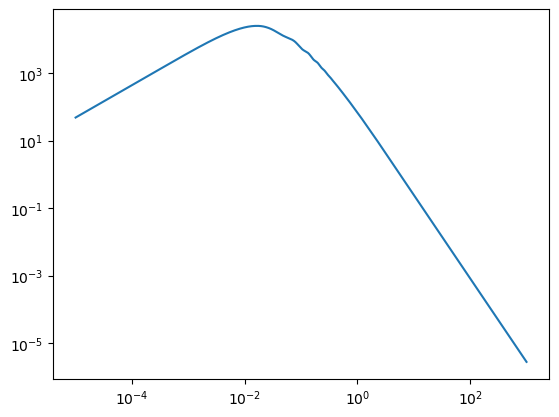

In [3]:
plt.loglog(kint, pint)

In [4]:
from transfer_functions_update_pk import Zenbu

In [5]:
modPT = Zenbu(kint, pint,jn=5)

104.43209969501503


In [6]:
modPT.p_integrals(1.0)

DeviceArray([61.66000877, 70.61209097, 55.2259826 , 21.35075797], dtype=float64)

In [7]:
import time

t1 = time.time()
ptable = modPT.make_ptable()
t2 = time.time()

print(t2-t1)

2.1604838371276855


In [8]:
Rb3 = modPT.qf.Rb3
R1 = modPT.qf.R1
R2 = modPT.qf.R2

In [9]:
from jax import jit

def ptable_func(pint):
    modPT.update_power_spectrum(pint)
    ptable = modPT.make_ptable()
    return ptable

ptable_jit = jit(ptable_func)
ptable_jit(pint)

t1 = time.time()
ptable = ptable_jit(pint)
t2 = time.time()

print(t2-t1)

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=0/1)>
0.07680296897888184


(10.0, 50000.0)

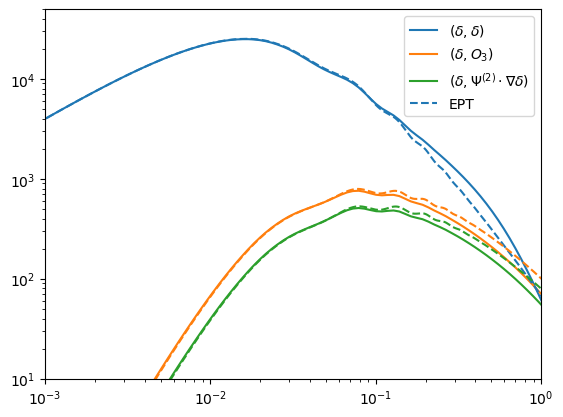

In [10]:
D = 1

plt.loglog(ptable[:,0], ptable[:,1], label=r'$(\delta,\delta)$')
plt.loglog(ptable[:,0], ptable[:,2], label=r'$(\delta,O_3)$')
plt.loglog(ptable[:,0], ptable[:,3], label=r'$(\delta,\Psi^{(2)}\cdot\nabla\delta)$')

plt.loglog(modPT.qf.k, D**2 * pint,'C0--',label='EPT')
plt.loglog(modPT.qf.k, D**4 * Rb3, 'C1--')
plt.loglog(modPT.qf.k, D**4 * 3./7*(R1+R2), 'C2--')

plt.legend()

plt.xlim(1e-3,1)
plt.ylim(1e1*D**4,5e4*D**2)

0.08224201202392578


(0.0010000000000000002, 500.0000000000001)

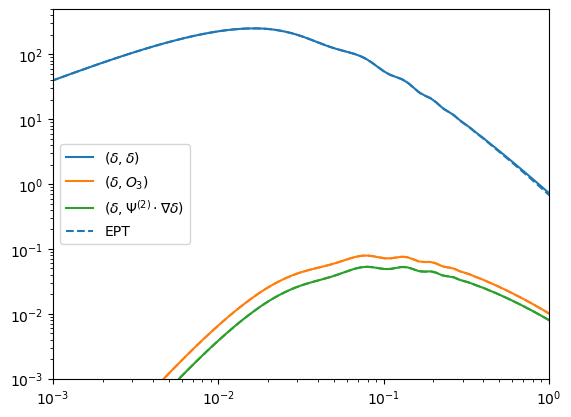

In [11]:
D = 0.1

t1 = time.time()
ptable = ptable_jit(D**2 * pint)
t2 = time.time()

print(t2-t1)

plt.loglog(ptable[:,0], ptable[:,1], label=r'$(\delta,\delta)$')
plt.loglog(ptable[:,0], ptable[:,2], label=r'$(\delta,O_3)$')
plt.loglog(ptable[:,0], ptable[:,3], label=r'$(\delta,\Psi^{(2)}\cdot\nabla\delta)$')

plt.loglog(modPT.qf.k, D**2 * pint,'C0--',label='EPT')
plt.loglog(modPT.qf.k, D**4 * Rb3, 'C1--')
plt.loglog(modPT.qf.k, D**4 * 3./7*(R1+R2), 'C2--')

plt.legend()

plt.xlim(1e-3,1)
plt.ylim(1e1*D**4,5e4*D**2)

0.07741689682006836


(10.0, 50000.0)

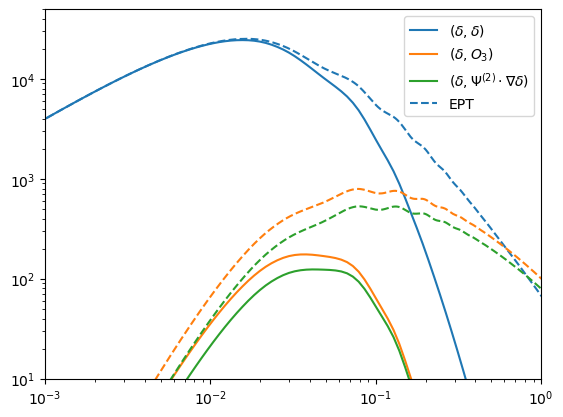

In [12]:
D = 1

t1 = time.time()
ptable = ptable_jit(D**2 * pint * np.exp(-(10*kint)**2))
t2 = time.time()

print(t2-t1)

plt.loglog(ptable[:,0], ptable[:,1], label=r'$(\delta,\delta)$')
plt.loglog(ptable[:,0], ptable[:,2], label=r'$(\delta,O_3)$')
plt.loglog(ptable[:,0], ptable[:,3], label=r'$(\delta,\Psi^{(2)}\cdot\nabla\delta)$')

plt.loglog(modPT.qf.k, D**2 * pint,'C0--',label='EPT')
plt.loglog(modPT.qf.k, D**4 * Rb3, 'C1--')
plt.loglog(modPT.qf.k, D**4 * 3./7*(R1+R2), 'C2--')

plt.legend()

plt.xlim(1e-3,1)
plt.ylim(1e1*D**4,5e4*D**2)

0.10345911979675293


(10.0, 50000.0)

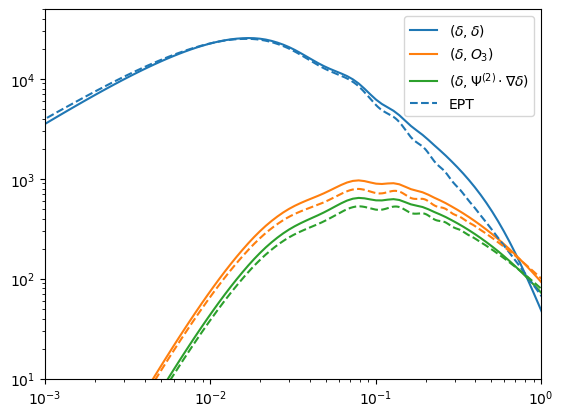

In [15]:
D = 1

t1 = time.time()
ptable = ptable_jit(D**2 * pint * (kint/0.01)**0.05)
t2 = time.time()

print(t2-t1)

plt.loglog(ptable[:,0], ptable[:,1], label=r'$(\delta,\delta)$')
plt.loglog(ptable[:,0], ptable[:,2], label=r'$(\delta,O_3)$')
plt.loglog(ptable[:,0], ptable[:,3], label=r'$(\delta,\Psi^{(2)}\cdot\nabla\delta)$')

plt.loglog(modPT.qf.k, D**2 * pint,'C0--',label='EPT')
plt.loglog(modPT.qf.k, D**4 * Rb3, 'C1--')
plt.loglog(modPT.qf.k, D**4 * 3./7*(R1+R2), 'C2--')

plt.legend()

plt.xlim(1e-3,1)
plt.ylim(1e1*D**4,5e4*D**2)